# [COVID-19] - Data visualization and Analysis.

Covid-19, also known as coronavirus, is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was primally identified in December 2019 in Wuhan, China and has spread globally, resulting in an ongoing pandemic (Wikipedia). This notebook shows the impact caused by covid around the world and brings a brief study in Brazil.


---

#### Last time executed:

In [2]:
import datetime as dt
print(dt.datetime.now())

2020-05-30 18:17:00.805696


#### Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#### Data obtained from Johns Hopkins University.<br> 
Source: https://github.com/CSSEGISandData/COVID-19

In [4]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [5]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81


In [6]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,930,938,996,1040,1075,1097,1128,1138,1209,1259
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,758,771,777,783,789,795,803,812,823,851
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,639,652,653,653,663,676,676,681,684
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,18,18,18,18,18,18,18


In [7]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4


In [8]:
start_date = '1/22/20'
# end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')
end_date = df_confirmed_cases.columns[-1]

In [9]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [10]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Turkey,0,0,0,0,0,0,0,0,0,0,...,152587,153548,154500,155686,156827,157814,158762,159797,160979,162120
India,0,0,0,0,0,0,0,0,1,1,...,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491
Germany,0,0,0,0,0,1,4,4,4,5,...,178473,179021,179710,179986,180328,180600,181200,181524,182196,182922
France,0,0,2,3,3,3,4,5,5,5,...,181700,181951,182354,182694,182709,183067,182847,183038,186364,186923
Italy,0,0,0,0,0,0,0,0,0,2,...,227364,228006,228658,229327,229858,230158,230555,231139,231732,232248
Spain,0,0,0,0,0,0,0,0,0,0,...,232555,233037,234824,235290,235772,235400,236259,236259,237906,238564
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,249619,252246,255544,258504,260916,262547,266599,268619,270508,272607
Russia,0,0,0,0,0,0,0,0,0,2,...,308705,317554,326448,335882,344481,353427,362342,370680,379051,387623
Brazil,0,0,0,0,0,0,0,0,0,0,...,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166


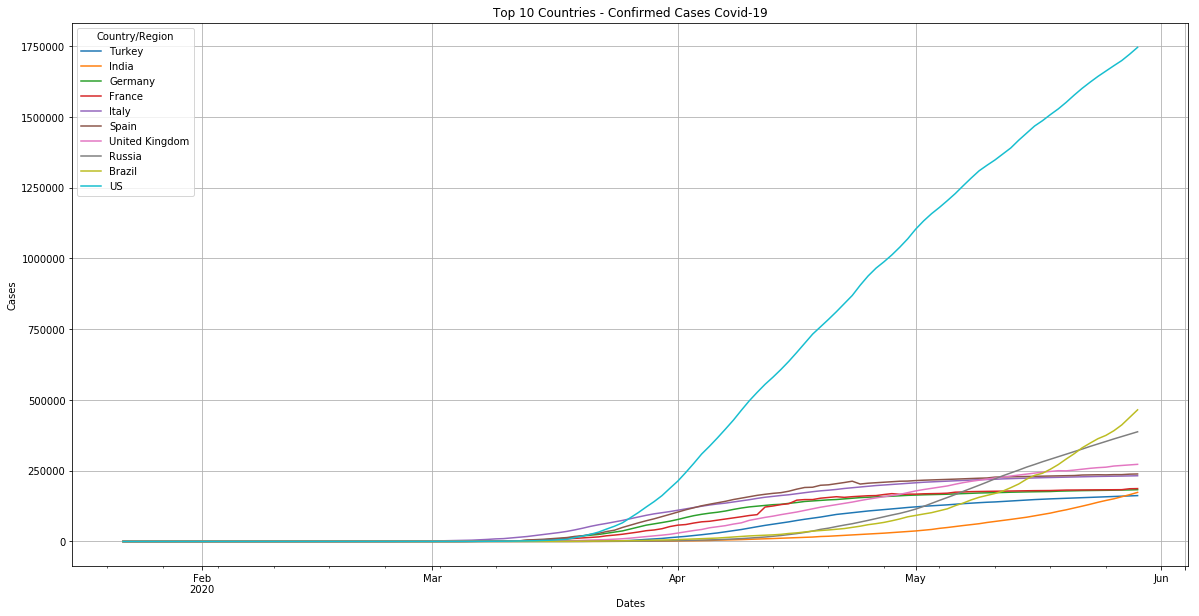

In [11]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data about recovered cases from Top 10 Countries Confimed Cases by name.

In [12]:
top10_countries = df_top10.columns.tolist() # Name of countries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [13]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1116,1134,1142,1149,1151,1161,1161,1166,1167,1172
France,0,0,0,0,0,0,0,0,0,0,...,63472,63976,64327,64665,64735,65317,65997,66702,67309,67921
India,0,0,0,0,0,0,0,0,0,0,...,45422,48553,51824,54385,57692,60706,64277,67749,70920,82627
Turkey,0,0,0,0,0,0,0,0,0,0,...,113987,114990,116111,117602,118694,120015,121507,122793,124369,125963
Spain,0,0,0,0,0,0,0,0,0,0,...,150376,150376,150376,150376,150376,150376,150376,150376,150376,150376
Italy,0,0,0,0,0,0,0,0,0,0,...,132282,134560,136720,138840,140479,141981,144658,147101,150604,152844
Russia,0,0,0,0,0,0,0,0,0,0,...,85392,92681,99825,107936,113299,118798,131129,142208,150993,159257
Germany,0,0,0,0,0,0,0,0,0,0,...,156966,158087,159064,159716,160281,161199,161967,162820,163360,164245
Brazil,0,0,0,0,0,0,0,0,0,0,...,116683,125960,135430,142587,149911,153833,158593,166647,177604,189476


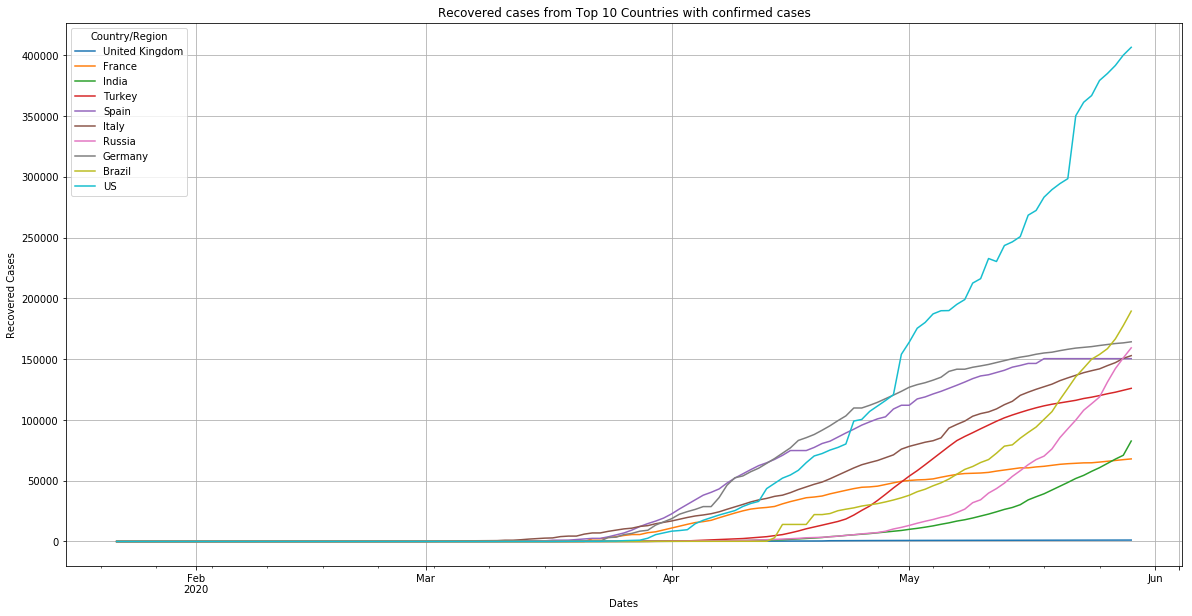

In [14]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

In [15]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [16]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,2972,3099,3249,3388,3541,3633,3807,3968,4142,4374
Turkey,0,0,0,0,0,0,0,0,0,0,...,4222,4249,4276,4308,4340,4369,4397,4431,4461,4489
India,0,0,0,0,0,0,0,0,0,0,...,3434,3584,3726,3868,4024,4172,4344,4534,4711,4980
Germany,0,0,0,0,0,0,0,0,0,0,...,8144,8203,8228,8261,8283,8309,8372,8428,8470,8504
Spain,0,0,0,0,0,0,0,0,0,0,...,27888,27940,28628,28678,28752,26834,27117,27117,27119,27121
Brazil,0,0,0,0,0,0,0,0,0,0,...,18859,20047,21048,22013,22666,23473,24512,25598,26754,27878
France,0,0,0,0,0,0,0,0,0,0,...,28135,28218,28292,28335,28370,28460,28533,28599,28665,28717
Italy,0,0,0,0,0,0,0,0,0,0,...,32330,32486,32616,32735,32785,32877,32955,33072,33142,33229
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,35786,36124,36475,36757,36875,36996,37130,37542,37919,38243


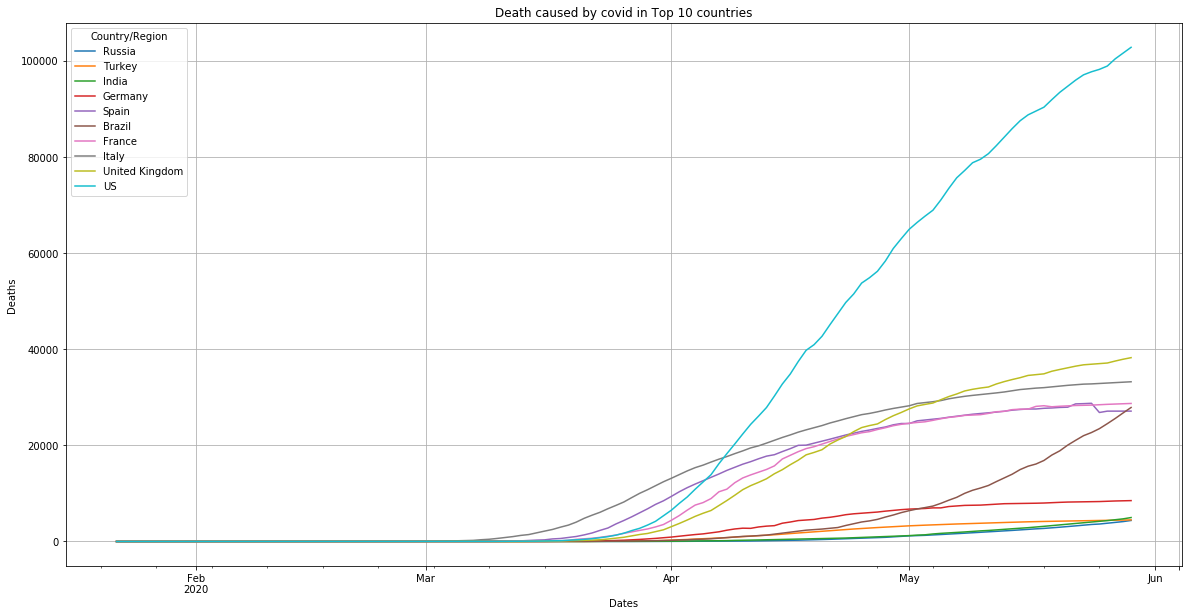

In [17]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_death.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

Active cases = Confirmed - Recovered - Deaths

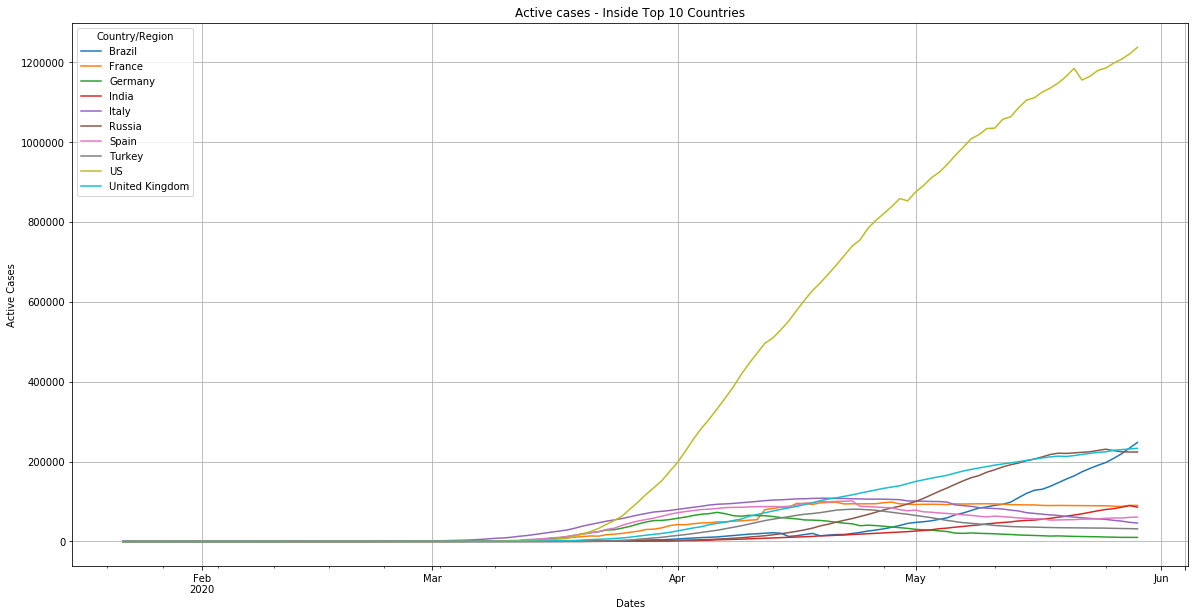

In [18]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_active = df_top10 - df_recovered - df_death
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

## Brazil case study


In [19]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [20]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)
df_brazil_confirmed.columns = ['Cases']

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)
df_brazil_recovered.columns = ['Cases']

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)
df_brazil_deaths.columns = ['Cases']

df_brazil_active = df_brazil_confirmed - df_brazil_recovered - df_brazil_deaths
df_brazil_closed = df_brazil_recovered + df_brazil_deaths

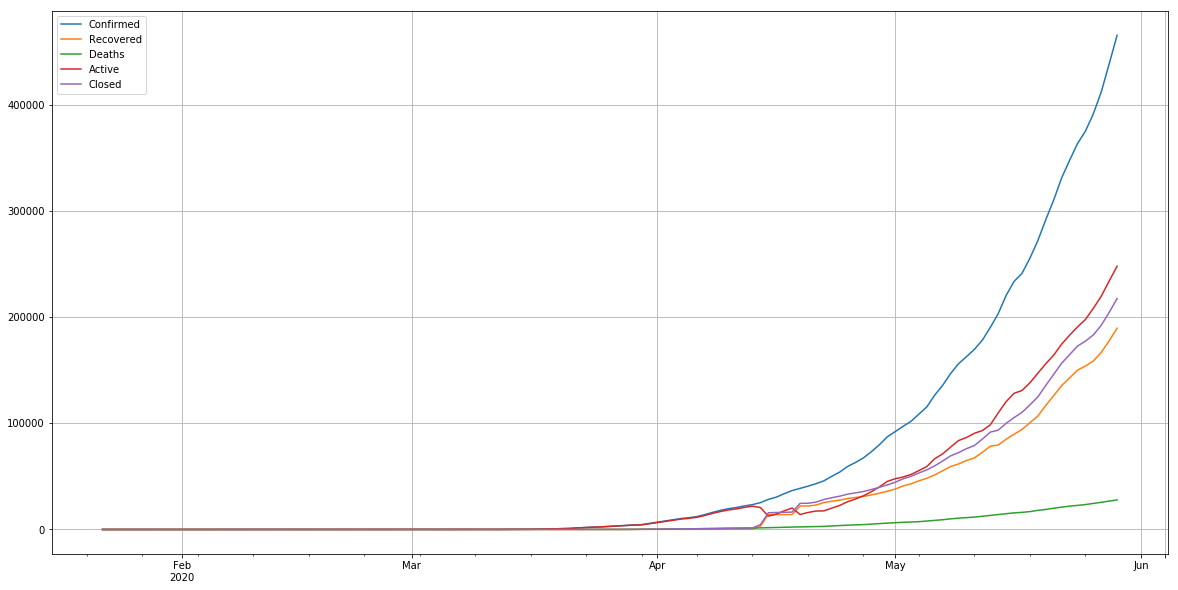

In [21]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)
legend_name = ['Confirmed', 'Recovered', 'Deaths', 'Active', 'Closed']
df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
df_brazil_active.plot(ax=ax_6, legend=True)
df_brazil_closed.plot(ax=ax_6, legend=True)
ax_6.legend(legend_name)
ax_6.grid(True)

### Data about last 24 hours

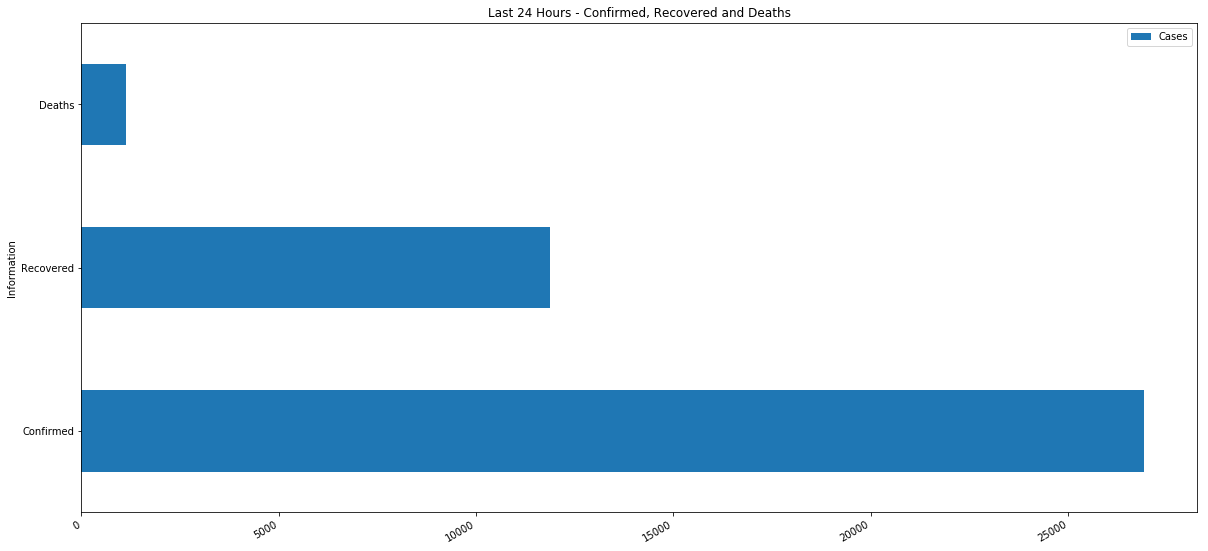

In [22]:
confirmed_daily = df_brazil_confirmed.iloc[-1,0] - df_brazil_confirmed.iloc[-2,0]
recovered_daily = df_brazil_recovered.iloc[-1,0] - df_brazil_recovered.iloc[-2,0]
deaths_daily = df_brazil_deaths.iloc[-1,0] - df_brazil_deaths.iloc[-2,0]
data = {'Information':['Confirmed', 'Recovered', 'Deaths'], 'Cases':[confirmed_daily, recovered_daily, deaths_daily]}
df_last24hours = pd.DataFrame(data)
fig = plt.figure(figsize = (20, 10))
ax_7 = fig.add_subplot(1,1,1)
df_last24hours.plot.barh(ax=ax_7, x='Information')
ax_7.set_title("Last 24 Hours - Confirmed, Recovered and Deaths",fontsize=12)
fig.autofmt_xdate()

### Growth rate by week in Brazil

In [29]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=7)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=7)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=7)

             Cases
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
...            ...
2020-04-30   87187
2020-05-01   92202
2020-05-02   97100
2020-05-03  101826
2020-05-04  108620
2020-05-05  115455
2020-05-06  126611
2020-05-07  135773
2020-05-08  146894
2020-05-09  156061
2020-05-10  162699
2020-05-11  169594
2020-05-12  178214
2020-05-13  190137
2020-05-14  203165
2020-05-15  220291
2020-05-16  233511
2020-05-17  241080
2020-05-18  255368
2020-05-19  271885
2020-05-20  

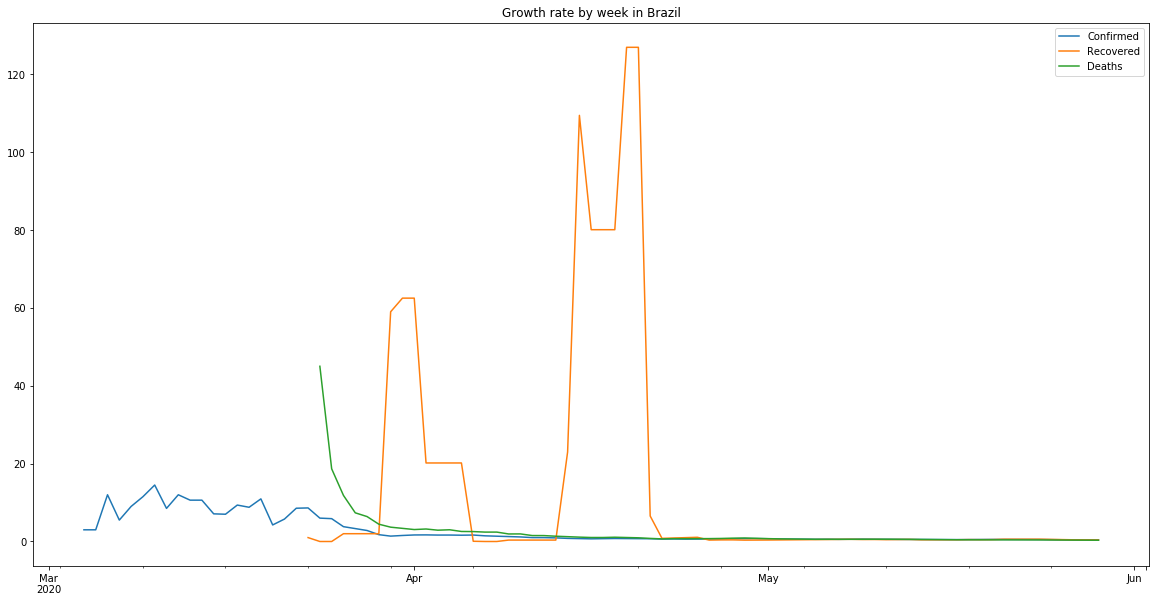

In [24]:
fig = plt.figure(figsize = (20, 10))
ax_8 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_8, legend=True)
df_growth_recovered.plot(ax=ax_8, legend=True)
df_growth_deaths.plot(ax=ax_8, legend=True)
ax_8.set_title('Growth rate by week in Brazil', fontsize=12)
ax_8.legend(df_names);

### Growth rate by Day in Brazil

In [25]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=1)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=1)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=1)

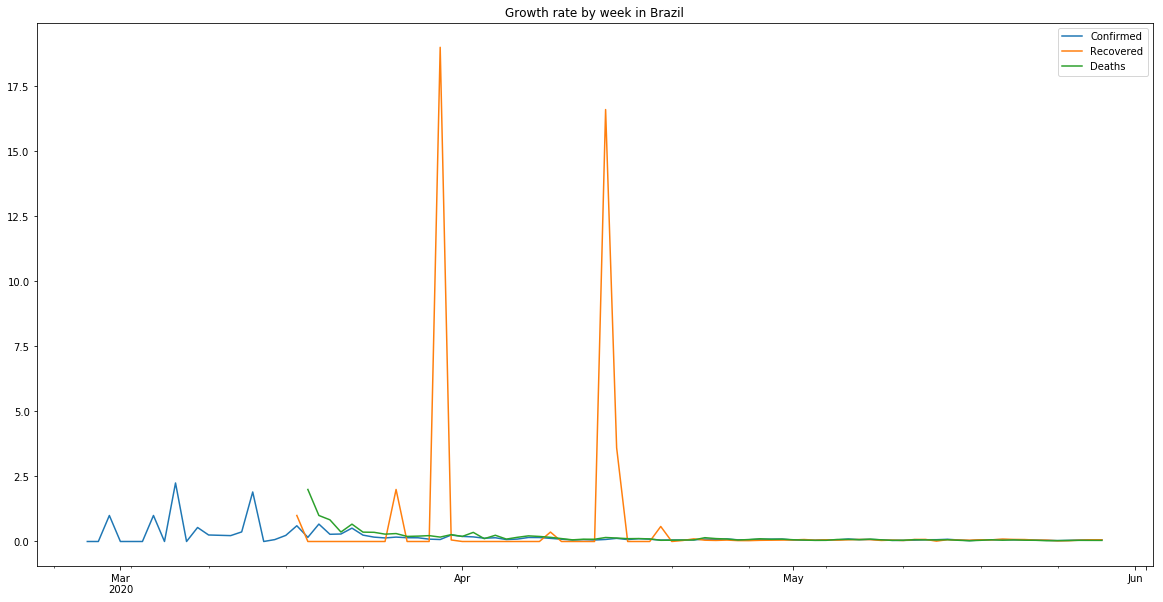

In [26]:
fig = plt.figure(figsize = (20, 10))
ax_9 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_9, legend=True)
df_growth_recovered.plot(ax=ax_9, legend=True)
df_growth_deaths.plot(ax=ax_9, legend=True)
ax_9.set_title('Growth rate by week in Brazil', fontsize=12)
ax_9.legend(df_names);

### Mortality rate and recovery rate


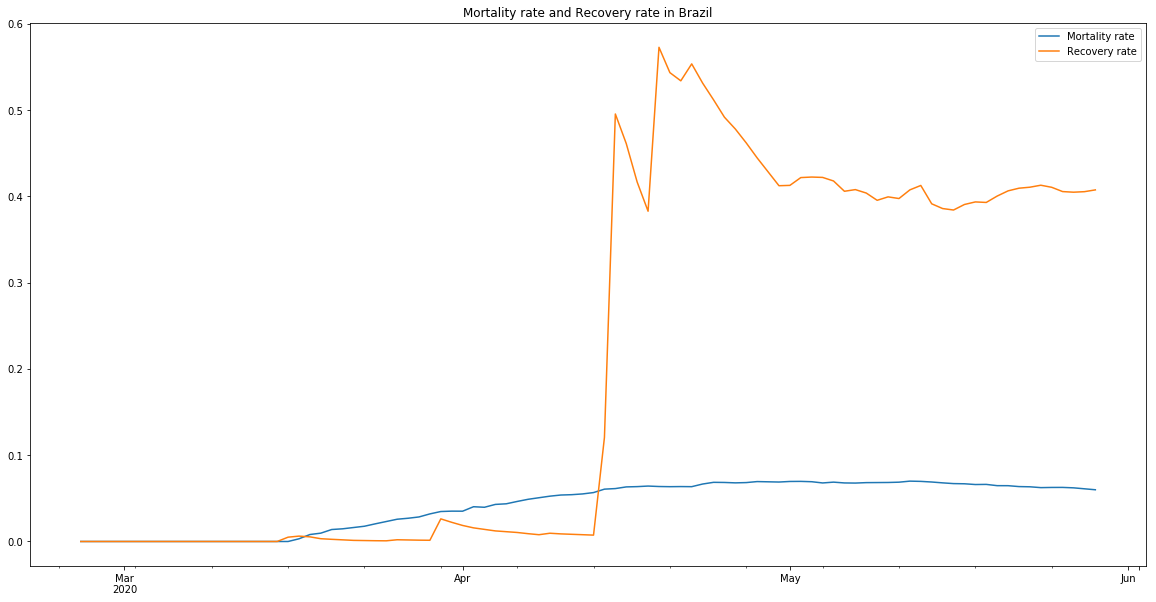

In [27]:
mortality_rate = df_brazil_deaths/df_brazil_confirmed
recovery_rate = df_brazil_recovered/df_brazil_confirmed
fig = plt.figure(figsize = (20, 10))
ax_10 = fig.add_subplot(1,1,1)
df_names=['Mortality rate','Recovery rate']
mortality_rate.plot(ax=ax_10)
recovery_rate.plot(ax=ax_10)
ax_10.legend(df_names)
ax_10.set_title('Mortality rate and Recovery rate in Brazil', fontsize=12);

### Doubling rate of Confirmed Cases

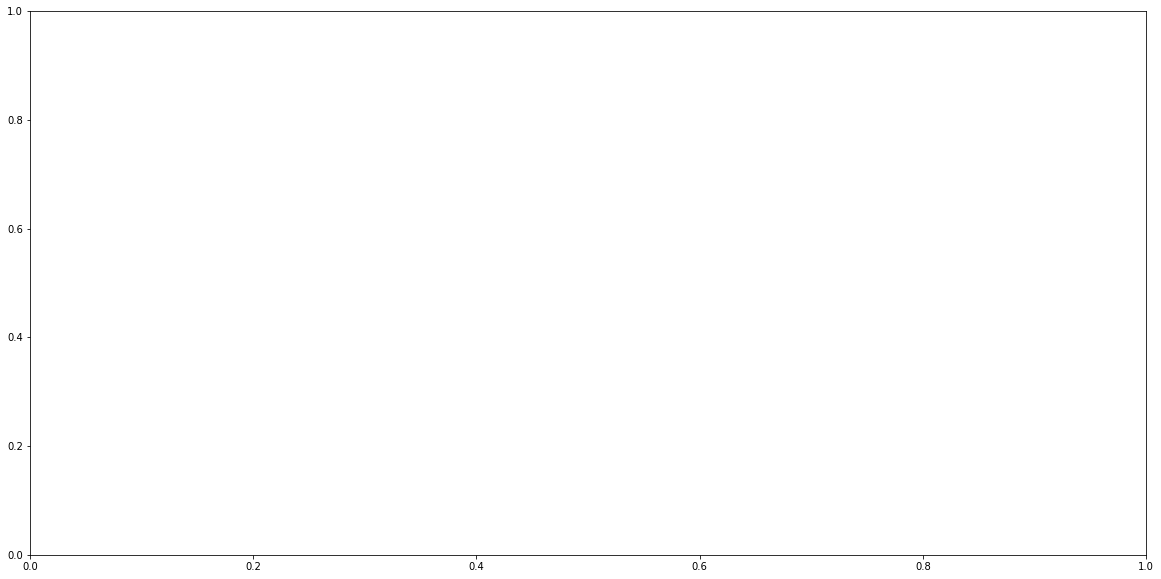

In [28]:
fig = plt.figure(figsize = (20, 10))
ax_11 = fig.add_subplot(1,1,1)


    